10가지 의류(0 ~ 9)를 예측하는 다중 분류 문제


데이터 준비하기

In [1]:
from tensorflow.keras.datasets.fashion_mnist import load_data

# 텐서플로우 저장소에서 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = load_data()


In [2]:
print(x_train.shape, x_test.shape)
# 학습은 6만 데이터
# 테스트는 1만 데이터

(60000, 28, 28) (10000, 28, 28)


데이터 그려보기

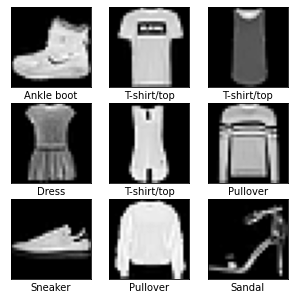

In [3]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

# Fashion-MNIST의 레이블에 해당하는 품목입니다.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sample_size = 9
# 0 ~ 59999의 범위에서 무작위로 9개의 정수를 뽑습니다.
random_idx = np.random.randint(60000, size=sample_size) 

plt.figure(figsize = (5, 5))
for i, idx in enumerate(random_idx):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap = 'gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()


In [4]:
print(x_train[1])
# 진할수록 255에 가까워짐

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  1

전처리 및 검증 데이터셋 만들기

In [5]:
# 값의 범위를 0에서 1 사이로 만들기 - 스케일링 -> minmax 알고리즘을 사용한다.

x_train = x_train / 255
x_test = x_test / 255

print(x_train[1])

[[0.         0.         0.         0.         0.         0.00392157
  0.         0.         0.         0.         0.16078431 0.7372549
  0.40392157 0.21176471 0.18823529 0.16862745 0.34117647 0.65882353
  0.52156863 0.0627451  0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.
  0.         0.19215686 0.53333333 0.85882353 0.84705882 0.89411765
  0.9254902  1.         1.         1.         1.         0.85098039
  0.84313725 0.99607843 0.90588235 0.62745098 0.17647059 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.05490196
  0.69019608 0.87058824 0.87843137 0.83137255 0.79607843 0.77647059
  0.76862745 0.78431373 0.84313725 0.8        0.79215686 0.78823529
  0.78823529 0.78823529 0.81960784 0.85490196 0.87843137 0.64313725
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.7372549
 

In [7]:
# 레이블 (정답지) 범주형 데이터로 변경하기

from tensorflow.keras.utils import to_categorical

# 실제 정답 비교를 위해서 0 ~ 9 정답지 따로 저장하기

real_y_test = y_test

# 각 데이터의 레이블을 범주형 형태로 변경하기
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

검증 데이터 세트 만들기

In [8]:
# 검증 데이터 세트 만들기

from sklearn.model_selection import train_test_split

#검증 데이터 = 쪽지시험

# 훈련 검증 데이터를 7:3 비율로 분리하기
x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train,
                                                  test_size = 0.3,
                                                  random_state =777)

첫 번째 모델 구성하기

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
# 2차원을 1차원으로 변경해줌

first_model = Sequential()
first_model.add(Flatten(input_shape=(28, 28)))
# Flatten(28, 28)함수 -> .(28 * 28) -> 1차원 784로 변환해준다.

first_model.add(Dense(64, activation='relu'))
first_model.add(Dense(32, activation='relu'))
first_model.add(Dense(10, activation='softmax'))


첫 번째 모델 설정하기

In [12]:
first_model.compile(loss='categorical_crossentropy', # 다중분류이므로
              optimizer='adam', 
              metrics=['accuracy'])

첫 번째 모델 학습하기

In [26]:
first_history = first_model.fit(x_train, y_train, 
                    epochs=30,
                    batch_size=128,
                    validation_data = (x_val, y_val))


Epoch 1/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1967 - accuracy: 0.9270 - val_loss: 0.3473 - val_accuracy: 0.8848
Epoch 2/30
329/329 [==============================] - 1s 3ms/step - loss: 0.1955 - accuracy: 0.9273 - val_loss: 0.3457 - val_accuracy: 0.8869
Epoch 3/30
329/329 [==============================] - 1s 3ms/step - loss: 0.1872 - accuracy: 0.9310 - val_loss: 0.3446 - val_accuracy: 0.8863
Epoch 4/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1890 - accuracy: 0.9277 - val_loss: 0.3479 - val_accuracy: 0.8876
Epoch 5/30
329/329 [==============================] - 1s 3ms/step - loss: 0.1840 - accuracy: 0.9319 - val_loss: 0.3487 - val_accuracy: 0.8898
Epoch 6/30
329/329 [==============================] - 1s 3ms/step - loss: 0.1813 - accuracy: 0.9335 - val_loss: 0.3642 - val_accuracy: 0.8830
Epoch 7/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1786 - accuracy: 0.9341 - val_loss: 0.3641 - val_accuracy: 0.8866
Epoch 

두번째 모델 구성하기

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
# 2차원을 1차원으로 변경해줌


# 모델 구성하기
second_model = Sequential() 
second_model.add(Flatten(input_shape=(28, 28))) # Flatten(28, 28)함수 -> .(28 * 28) -> 1차원 784로 변환해준다.
second_model.add(Dense(128, activation='relu')) # 128개의 출력을 가지는 Dense 층을 추가합니다. <- 기존 모델보다 층 하나 더 추가하기
second_model.add(Dense(64, activation='relu')) # 64개의 출력을 가지는 Dense 층
second_model.add(Dense(32, activation='relu')) # 32개의 출력을 가지는 Dense 층
second_model.add(Dense(10, activation='softmax')) # 10개의 출력을 가지는 Dense 층


# 모델 설정하기
second_model.compile(loss='categorical_crossentropy',  # 손실함수: categorical_crossentropy
              optimizer='adam',   # 옵티마이저: adam
              metrics=['accuracy']) # 모니터링할 평가지표: accuracy


# 모델 학습시키기
second_history = second_model.fit(x_train, y_train, 
                    epochs=30,
                    batch_size=128,
                    validation_data = (x_val, y_val))


Epoch 1/30
329/329 [==============================] - 3s 6ms/step - loss: 0.8870 - accuracy: 0.6933 - val_loss: 0.4358 - val_accuracy: 0.8498
Epoch 2/30
329/329 [==============================] - 1s 4ms/step - loss: 0.4265 - accuracy: 0.8496 - val_loss: 0.3888 - val_accuracy: 0.8664
Epoch 3/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3781 - accuracy: 0.8614 - val_loss: 0.3832 - val_accuracy: 0.8627
Epoch 4/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3511 - accuracy: 0.8716 - val_loss: 0.4026 - val_accuracy: 0.8486
Epoch 5/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3328 - accuracy: 0.8762 - val_loss: 0.3419 - val_accuracy: 0.8751
Epoch 6/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3061 - accuracy: 0.8875 - val_loss: 0.3559 - val_accuracy: 0.8721
Epoch 7/30
329/329 [==============================] - 1s 5ms/step - loss: 0.2923 - accuracy: 0.8936 - val_loss: 0.3270 - val_accuracy: 0.8837
Epoch 

학습결과 그래프

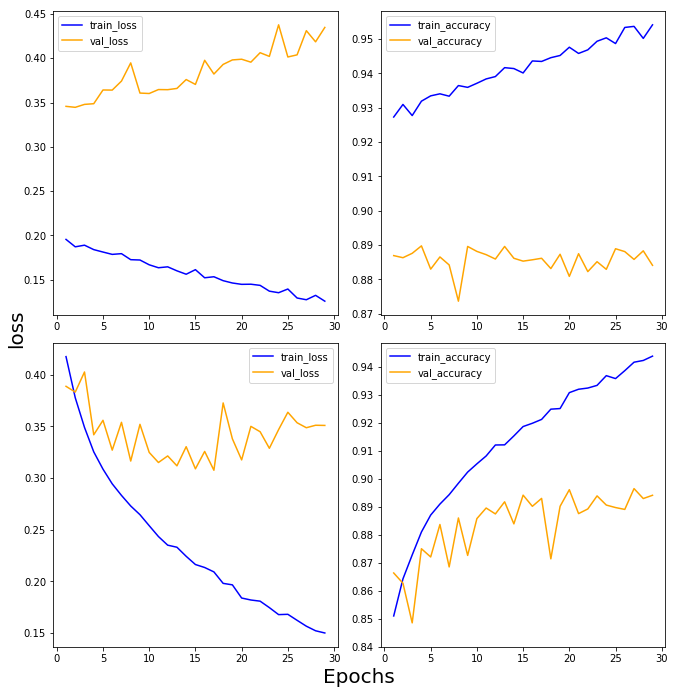

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def draw_loss_acc(history_1, history_2, epochs):
    his_dict_1 = history_1.history
    his_dict_2 = history_2.history
    keys = list(his_dict_1.keys())
    
    epochs = range(1, epochs)
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(1, 1, 1)
    # axis 선과 ax의 축 레이블을 제거합니다.
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

    for i in range(len(his_dict_1)):
        temp_ax = fig.add_subplot(2, 2, i + 1)
        temp = keys[i%2]
        val_temp = keys[(i + 2)%2 + 2]
        temp_history = his_dict_1 if i < 2 else his_dict_2
        temp_ax.plot(epochs, temp_history[temp][1:], 
                     color = 'blue', label = 'train_' + temp)
        temp_ax.plot(epochs, temp_history[val_temp][1:], 
                     color = 'orange', label = val_temp)
        if(i == 1 or i == 3):
            start, end = temp_ax.get_ylim()
            temp_ax.yaxis.set_ticks(np.arange(np.round(start, 2), end, 0.01))
        temp_ax.legend()
    ax.set_ylabel('loss', size = 20)
    ax.set_xlabel('Epochs', size = 20)
    plt.tight_layout()
    plt.show()
draw_loss_acc(first_history, second_history, 30)

     
    

   

모델 평가하기

In [28]:
print(first_model.evaluate(x_test, y_test))
print(second_model.evaluate(x_test, y_test))


313/313 [==============================] - 0s 1ms/step - loss: 0.4853 - accuracy: 0.8736
[0.48525649309158325, 0.8736000061035156]
313/313 [==============================] - 0s 1ms/step - loss: 0.4052 - accuracy: 0.8814
[0.4052242040634155, 0.8813999891281128]


모델 예측해서 그려보기

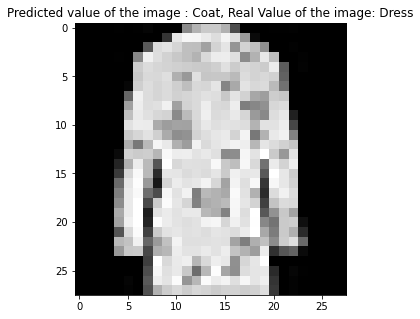

In [36]:
import numpy as np

results = first_model.predict(x_test)
np.set_printoptions(precision=7) # numpy 소수점 제한

arg_results = np.argmax(results, axis = -1) # 가장 큰 값의 인덱스를 가져옵니다.

import matplotlib.pyplot as plt

sample_size = 10
# 0 ~ 9999의 범위에서 무작위로 정수를 뽑습니다.
random_idx = np.random.randint(10000) 

plt.figure(figsize = (5, 5))
plt.imshow(x_test[random_idx], cmap = 'gray')
plt.title('Predicted value of the image : ' 
          + class_names[arg_results[random_idx]] 
          + ', Real Value of the image: '+class_names[real_y_test[random_idx]])
plt.show()
